Exploratory Data Analysis

In [1]:
#Importing Libaries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

#Loading Data

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Data Cleanup

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)


Filter for US Data Analyst Roles

In [2]:
df_DA_UK = df[(df['job_country'] == 'United Kingdom') & (df['job_title_short'] == 'Data Analyst')]


Plotting First Graphs

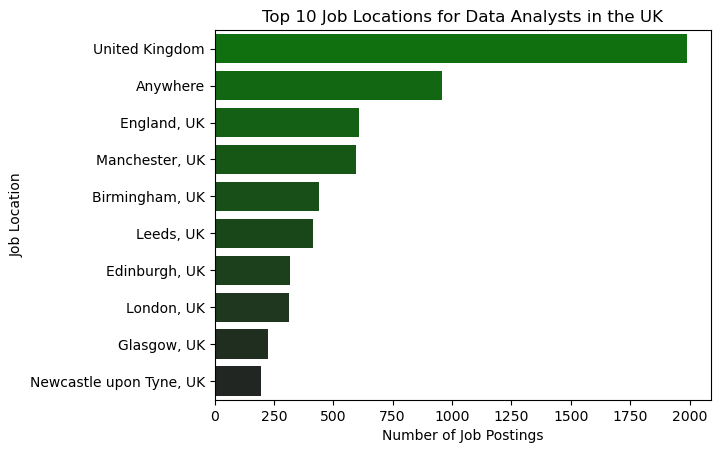

In [3]:
df_plot = df_DA_UK['job_location'].value_counts().head(10).reset_index()
df_plot.columns = ['job_location', 'count']

sns.barplot(data=df_plot, x='count', y='job_location', palette='dark:g_r')

plt.xlabel('Number of Job Postings')
plt.ylabel('Job Location')
plt.title('Top 10 Job Locations for Data Analysts in the UK')
plt.show()

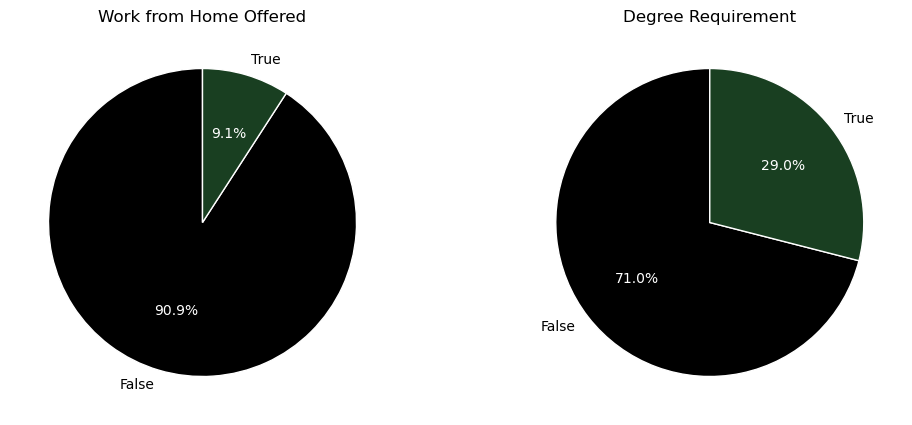

In [4]:
dict_column = {
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'Degree Requirement',
}

fig, ax = plt.subplots(1,2)
fig.set_size_inches((12,5))

# Define colors using a dark muted palette that complements dark green to red
colors = sns.cubehelix_palette(start=2, rot=0, dark=0, light=.95, reverse=True)

# Loop through columns and titles
for i, (column, title) in enumerate(dict_column.items()):
    # Plot pie chart
    wedges, texts, autotexts = ax[i].pie(
        df_DA_UK[column].value_counts(),
        labels=['False', 'True'],
        autopct='%1.1f%%',
        startangle=90,
        colors=colors,
        wedgeprops=dict(edgecolor='white')
    )
    
    # Set title
    ax[i].set_title(title)
    
    # Customize text for better visibility on dark colors
    for autotext in autotexts:
        autotext.set_color('white')

# Show plot
plt.show()

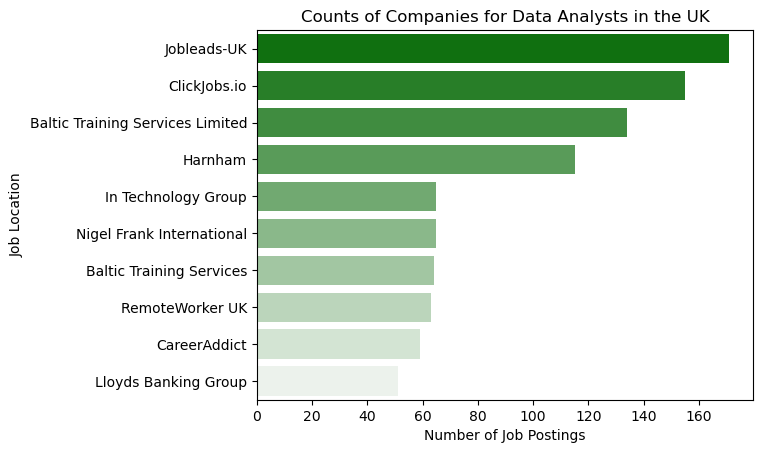

In [5]:
df_plot = df_DA_UK['company_name'].value_counts().head(10).reset_index()
df_plot.columns = ['company_name', 'count']

sns.barplot(data=df_plot, x='count', y='company_name', palette='light:g_r')

plt.xlabel('Number of Job Postings')
plt.ylabel('Job Location')
plt.title('Counts of Companies for Data Analysts in the UK')
plt.show()